In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf 
import ipywidgets

#Visualization of plots
from plotly.subplots import make_subplots
from tabulate import tabulate

# Decision tree: prepare data + estimation
from sklearn.preprocessing import LabelEncoder #to encode categorial variables
from sklearn.model_selection import train_test_split # split data in training and testing sample
from sklearn.tree import DecisionTreeClassifier # decision trees

# Visualization of the decision tree
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

# evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## For PDF file, all plotly plots are only visible on Juypter Notebook Files. 

**Exercise 1: Performance Measurement (40 points)**

Michael is the management accountant at PrimeConnect. He is responsible for preparing graphs for
the management report for the executive team. Last year, Michael received feedback that his graphs
were poorly designed and misleading. Therefore, you would like to use the knowledge you have
learned from the course to support Michael this year (year 2023). You need to use the data Michael
has collected. You can find the “PerformanceMeasurement2023.xlsx” Excel file. The variable
definitions are listed below.

**1.** (8 points) Michael prepared two graphs, labeled Graph 1 and Graph 2. He uses Graph 1 to
show how well PrimeConnect can attract new customers and the trends of number of the total
customers. Michael wants to use Graph 2 shows the financial performance of each category.
He uses the profits earned as the measurement. Can you explain to Michael why these graphs
are misleading and poorly designed? Whether these graphs are ugly, bad, or wrong graphs?

  Graph 1. 

  For Graph 1. Gained and Lost Customers for Phone Services, we observe: a. ugly; aesthetic problems b. bad; problems related to perception and c. wrong; problems related to mathematic or objectively incorrect. 

- a. Aesthetically, the graph is difficult to read. The font from x- and y-axis seems to be a bit different which could have been unified.

- b. Preceptionally, the graph does not necessarily need a 3-demension grpahically presentation. It appears to be confusing and unclear.

- c. Objectively, we see major error on the orange bar for *Precentage of Lost Customers.* The y-axis label should've been in percentage instead of acutal customer numbers. This shows that the data is not cearly presented as two comapred blue and orange are in different unit/measurement.  

Graph 2. 

For Graph 2. Profits by Product, we also observe some significant issues in terms of ugly, bad or wrong presentation. 

- a. Aesthetically, there was not a need for different colour bars for the categories as Devices and Internet are in Red whereas the rest two is in different colours. This creates confusion unless for specific explination for this choices of illustration. 

- b. Preceptionally, the graph needs not a 3-demension presentation as well. A 2D bar graph can convey the presentation well enough. In addition, this also creates a misconception on the numbers represented by the bars cannot be ascertained. There is also no explination on what x- and y-axis each represents. 

- c. Objectively, on y-axis, since the profits of products are so large that they are represented by scientific notation, it is wise to simplified them first and display a clearer numerical y-axis. It is easier to read this way. We can also see that due to the large number on y-axis, we cannot see any presentation for Streaming and this is also misleading mathematically since this seems to present that Streaming is not bringing in any profits at all which could simply be the large y-axis issues disorting the illustration. 

**2.** Create well-designed versions of Graph 1 and Graph 2 in Python. The file
'PerformanceMeasurement2023.xlsx' and 'PerformanceMeasurement2022.xlsx' contain the
necessary data. Michael hopes the graph can be interactive. He thinks it would be great to
consider the year 2022 data in the analysis as the benchmark. You can find the year 2022 data
in 'PerformanceMeasurement2022.xlsx', and the variable definition is the same as the year
2023 data.

In [2]:
df22 = pd.read_excel(r'PerformanceMeasurement_2022.xlsx')
df23 = pd.read_excel(r'PerformanceMeasurement_2023.xlsx')
df24 = df23.append(df22, ignore_index=True)

<ipython-input-2-7c7dd1074032>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df24 = df23.append(df22, ignore_index=True)


- **2.1** (8 points) For Graph 1, Michael would have a range slider, where you can select the
period depicted from 2022 to 2023. And the variables he would like to consider are the new
customer and lost customer ratio. The new customer (lost) ratio (PercentNew or PercentLost)
equals the number of new (lost) customers (NumberNew or NumberLost) divided by the total
number of customers (TotalCustomers).
Hint: To create Graph 1 append the 2022 data with the 2023 data and calculate the new and
lost customer ratios. The horizontal axis can be the month of each year.

In [3]:
df24['PercentNew_R'] = (df24['NumbNew'] / df24['TotalCustomers'])
df24['PercentLost_R'] = (df24['NumbLost'] / df24['TotalCustomers'])
df24['Date_Month']=pd.to_datetime(df24['Date']).dt.date
df24_phone = df24[df24['Category'] == 'Phone']
df24_phone_2 = pd.DataFrame(df24_phone.groupby(by=['Date_Month']).sum()).reset_index()

<ipython-input-3-6a461bc50362>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df24_phone_2 = pd.DataFrame(df24_phone.groupby(by=['Date_Month']).sum()).reset_index()


In [4]:
# Create a figure
fig = go.Figure()

# Add traces for new and lost customer ratios
fig.add_trace(
    go.Scatter(x=list(df24_phone_2['Date_Month']), 
               y=list(df24_phone_2['PercentNew_R']),
               mode='lines+markers',
               name="New Customer Ratio")
)

fig.add_trace(
    go.Scatter(x=list(df24_phone_2['Date_Month']), 
               y=list(df24_phone_2['PercentLost_R']),
               mode='lines+markers',
               name="Lost Customer Ratio")
)

# Set title
fig.update_layout(
    title_text="Graph 1: Gained and Lost Customers for Phone Services",
)

# Update x-axis and y-axis titles
fig.update_xaxes(
    title_text="Date",
    title_font={"size": 10}
)

fig.update_yaxes(
    title_text="Customer Ratio",
    title_font={"size": 10}
)

# Add range slider and buttons
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()


- **2.2** (8 points) For Graph 2, Michael would like to have buttons where the category of profit
can be selected. And for each category, he hopes to see the profits for year 2023.
Hint: To create Graph 1, use the 2023 data and create buttons for selecting category to display
profits.

In [5]:
buttons = []
i = 0

fig = go.Figure()

category_list = list(df23['Category'].unique())

category_list

['Phone', 'Internet', 'Streaming', 'Online Security', 'Devices']

In [6]:
# creating Traces with Bar Charts for each Market, that can be later selected via the buttons menu
for category in category_list:
    fig.add_trace(
        go.Bar(
            x = df23['Date'][df23['Category']==category], # Dates and Sales are filterd regarding the markets
            y = df23['Profits'][df23['Category']==category], 
            name = category , visible = (i==0)
        )
    )

## the first option, displays the data for all four markets at ounce    
args = [True] * len(category_list)   
button = dict(label = "All Markets",
                  method = "update",
                  args=[{"visible": args}])
buttons.append(button)

## next, we create the options to diplay individual markets
for i, category in enumerate(category_list):
    args = [False] * len(category_list)
    args[i] = True  # Set the current category to be visible
    
    buttons.append(dict(
        label=category,
        method="update",
        args=[{"visible": args}]
    ))

fig.update_layout(updatemenus=[dict(active=0,
                                    type="buttons",
                                    direction = "left",
                                    buttons=buttons,
                                    x = 0,
                                    y = 1.01,
                                    xanchor = 'left',
                                    yanchor = 'bottom'),
                              ],
                  title_text="Graph 2: Profits by Product")

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)


Recently, Michael learned the Balanced Scorecard concept from you. He is thinking about
implementing it for PrimeConnect and, therefore, collected some performance measures and their
targets in the file 'KPI.xlsx'
. He asks you for some help regarding the visualization and interpretation of
the balanced scorecard.

**3.** (8 points) Visualize the Balanced Scorecard. Make it interactive in a way that the market
displayed can be selected. Add colored performance markers, whereby green indicates that
the target is exceeded, yellow indicates that the target is met, and red indicates that the
target is not met.

Hint: For more than two cases, use if, elif, and else.

In [7]:
kpi = pd.read_excel(r'KPI.xlsx')


In [8]:
pd.options.mode.chained_assignment = None #turns off the warning due to chain assignment

kpi['Target Diff'] = kpi['Target Performance']-kpi['Actual Performance']

kpi['Target Reached']="" 


for i in range(0,len(kpi)):
    if kpi['Measure'][i] in ['Average network speed available (in Mbps)', 'Increase from revenue from new customer acquisition', 'Market share in telecomunication industry', 'Network availability (in percent)', 'Newly gained customers', 'Revenue Growth','Number of annual training hour per employee']:
        if kpi['Target Diff'][i]<0:
            kpi['Target Reached'][i]="yes"
        elif kpi['Target Diff'][i]==0:
            kpi['Target Reached'][i]="met"
        else:
            kpi['Target Reached'][i]="no"
    if kpi['Measure'][i] in ["Churn rate", 'Subscriber acquisition costs']:
        if kpi['Target Diff'][i]>0:
            kpi['Target Reached'][i]="yes"
        elif kpi['Target Diff'][i]==0:
            kpi['Target Reached'][i]="met"
        else:
            kpi['Target Reached'][i]="no"

def reached_target(row):    
    fail = 'background-color: orangered;'
    meet = 'background-color: yellow;'
    exceed = 'background-color: lawngreen;'
    financial = 'background-color: lightblue;'
    customer = 'background-color: peachpuff;'
    internal = 'background-color: lavender;'
    learning = 'background-color: mistyrose;'

    if (row['Target Reached'] == "yes") & (row['Perspective'] == "Financial") :
        return [financial,financial, financial, financial,financial, exceed]
    if (row['Target Reached'] == "met") & (row['Perspective'] == "Financial") :
        return [financial,financial, financial, financial,financial, meet] 
    elif (row['Target Reached'] == "no") & (row['Perspective'] == "Financial") :
        return [financial,financial, financial, financial,financial, fail] 
    elif (row['Target Reached'] == "yes") & (row['Perspective'] == "Customer") :
        return [customer,customer,customer,customer,customer, exceed] 
    elif (row['Target Reached'] == "met") & (row['Perspective'] == "Customer") :
        return [customer,customer,customer,customer,customer, meet]  
    elif (row['Target Reached'] == "no") & (row['Perspective'] == "Customer") :
        return [customer,customer,customer,customer,customer, fail]
    elif (row['Target Reached'] == "yes") & (row['Perspective'] == "Internal Process") :
        return [internal,internal,internal,internal,internal, exceed] 
    elif (row['Target Reached'] == "met") & (row['Perspective'] == "Internal Process") :
        return [internal,internal,internal,internal,internal, meet]  
    elif (row['Target Reached'] == "no") & (row['Perspective'] == "Internal Process") :
        return [internal,internal,internal,internal,internal, fail] 
    elif (row['Target Reached'] == "yes") & (row['Perspective'] == "Learning and Growth") :
        return [learning,learning,learning,learning,learning, exceed] 
    elif (row['Target Reached'] == "met") & (row['Perspective'] == "Learning and Growth") :
        return [learning,learning,learning,learning,learning, meet]  
    elif (row['Target Reached'] == "no") & (row['Perspective'] == "Learning and Growth") :
        return [learning,learning,learning,learning,learning, fail] 
    
market_list = list(kpi['Market'].unique())
    
drop_down = ipywidgets.Dropdown(options = market_list, 
                               description = 'Market:', 
                               disabled=False,
                               )


def balanced_scorecard(market):
    kpifilter=kpi[kpi['Market']==market]
    kpifilter=kpifilter[['Perspective', 'Strategy Pursued','Measure', 'Target Performance', 'Actual Performance', 'Target Reached']]
    return kpifilter.style.apply(reached_target, subset=['Perspective', 'Strategy Pursued','Measure', 'Target Performance', 'Actual Performance', 'Target Reached'], axis='columns')

ipywidgets.interact(balanced_scorecard, market=drop_down)

interactive(children=(Dropdown(description='Market:', options=('West', 'East', 'South ', 'Central'), value='We…

<function __main__.balanced_scorecard(market)>

**4.** (8 points) Could you please recommend one additional measure that could be included in
the Balanced Scorecard? Please explain why it would be useful to include in the Balanced
Scorecard and which perspective of the Balanced Scorecard it belongs to. Additionally, please
describe the types of data that would be required to track each measure and evaluate
whether this data is readily available or easily collectible for firms.

One additional measure culd be included in the Balanced Scorecard could be *"Employee Turnover Rate".* This would be included in the perspective of *"Learning and Growth"* section. We can first see that 1. Learning and Growth persepctive only has one Measure which is "Number of annual training hour per employee". It would be benificial to include more Measure in this Persepctive to get a clearer aspect of it. We can see that the Strategy Pursued in Learning and Growth is to Increase Employee Competence. This means that we should focus on trining employee to elevate their advancement in this company. If the Employee Turnover Rate is high, that means the company is spending hours on traning basic skills or introductive skills for new employees overtime and that is simply not a good indication if the company wants to grow steadily and keep hardworking, long-staying loyal employees. That is an indicator that should be focused.

The types of data that would be required to track should be Measureable and able to Quantified. We can see that all measuremeants fit this description. Most of these measures requires numerical data. For a few measure such as revenue growth, churn rate, annual training hour per employee, these measures require Time Bound settings. The measure should have specific time bound for firms to collect as it is not always readily avaiable. For average network speed available and newly gained customers, these are measures that are readily available. 

**Exercise 2: Prediction (35 points)**

Jennifer, who works at the controlling department of PrimeConnect, read that it takes up to 5 times
more money to attract new customers than to keep the ones you already have. 1 Additionally,
PrimeConnect is also working to cultivate customer loyalty and encourage continued subscription to
its services. Therefore, she wants to predict which customers are likely to cancel their business in the
next six months (churn). PrimeConnect can use this information to offer these customers a discount to
incentivize them to stay at PrimeConnect.

Jennifer asks you to develop a decision tree model that predicts whether customers will churn.
Therefore, she collected some customer data in the file "CusotmerProfile.xlsx". 

Further, Jennifer prepared for each case an estimate of the customer's lifetime value (expected
profits earned from a customer over the whole future relationship):
- Customers who stay at PrimeConnect have a lifetime value of 1,000 USD.
- Customers who churn have a customer lifetime value of 0 USD.
- PrimeConnect expects an average customer lifetime value of 400 USD if they can offer
discounts to a customer who will churn. This estimate includes the probability that the
customer will accept the offer, the lower profit due to the discount, and the higher likelihood
that the customer will leave in the future.
- If PrimeConnect offers discounts to customers, who would have stayed either way, they expect
the customer lifetime value to drop to 800 USD.

In [9]:
pc = pd.read_excel(r'CusotmerProfile.xlsx')

**1.** (7 points) What is the dependent variable? Which items would you include as independent
variables? Explain why.
Hint: Not all the items are included as independent variables. Some of the variables can not be
included because of target leakage. And some of the variables do not provide any new
information.

- Dependent variable is **"Chrun"** which states whether the customer churned or not. 

- Independent variables **do not include Gender, Reason, TotalCharges**. Since *Gender and TotalCharges variables* does not provide any new information. More, *Gender variable* cannot be changed and *TotalCharges varaible* is connected to *Tenure and MonthlyCharges variables* which does not provide any new information. *Reason variable*  only applies to those who *Churn varaible == Yes* hence it cannot be included because of target leakage. 
The rest of variables **"MonthlyCharges", "PaymentMethod", "OnlineSecurity", "Tenure", and "Contract"** can be kept. 

**2.** (6 points) Start with splitting the data into a train and test sample.
Hint: Firstly, You need to delete the customers with missing variables in the item and encode
all categorical variables. Remember to use the parameter option random_state. You can decide
your own test size.

<Axes: >

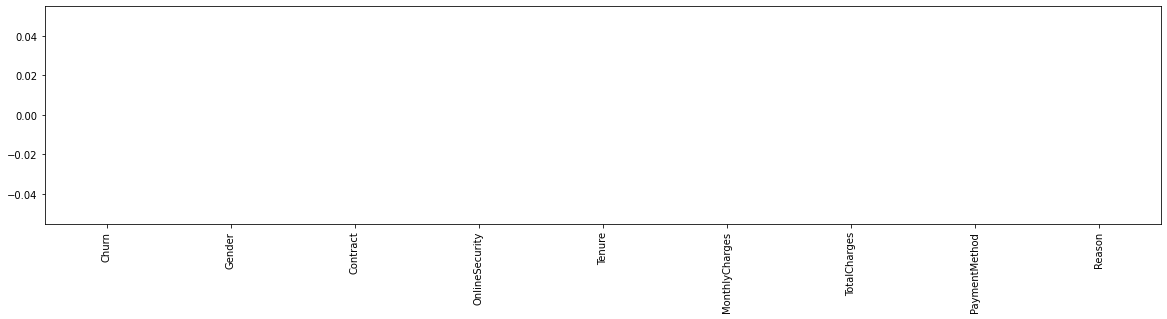

In [10]:
missv = ((pc.isnull().sum()/len(pc))*100).sort_values(ascending=True)
missv.plot(kind='bar', legend=None, figsize=(20, 4)) 

In [11]:
pc = pc.dropna()
pc.head(3)

,Churn,Gender,Contract,OnlineSecurity,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Reason
0,Yes,Male,Month-to-month,Yes,2,53.85,108.15,Mailed check,Network Coverage
1,Yes,Female,Month-to-month,No,2,70.70,151.65,Electronic check,Customer Service
2,Yes,Female,Month-to-month,No,8,99.65,820.50,Electronic check,Customer Service


In [12]:
encode = LabelEncoder()
pc['Churn'] = encode.fit_transform(pc['Churn'])
pc['Gender'] = encode.fit_transform(pc['Gender'])
pc['Contract'] = encode.fit_transform(pc['Contract'])
pc['OnlineSecurity'] = encode.fit_transform(pc['OnlineSecurity'])
pc['PaymentMethod'] = encode.fit_transform(pc['PaymentMethod'])
pc['Reason'] = encode.fit_transform(pc['Reason'])

In [13]:
final_variables = ["Churn","MonthlyCharges", "PaymentMethod", "OnlineSecurity", "Tenure","Contract"]
pc = pc[final_variables]

In [14]:
pc.head(3)

,Churn,MonthlyCharges,PaymentMethod,OnlineSecurity,Tenure,Contract
0,1,53.85,3,2,2,0
1,1,70.70,2,0,2,0
2,1,99.65,2,0,8,0


In [15]:
X = pc[[ "MonthlyCharges", "PaymentMethod", "OnlineSecurity", "Tenure","Contract"]]
y = pc['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

**3.** (4 points) Estimate a fully grown decision tree and show its maximum depth.
Hint: Remember to use the parameter option random_state.

In [16]:
clf = DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
print(clf.tree_.max_depth)

29


**4.** (4 points) Estimate a decision tree with the Cost-Complexity Pruning Method with alpha =
0.0015. Visualize this decision tree.

In [17]:
clfccp = DecisionTreeClassifier(ccp_alpha=0.0015,random_state=1)
clfccp = clfccp.fit(X_train, y_train)
print(clfccp.tree_.max_depth)

5


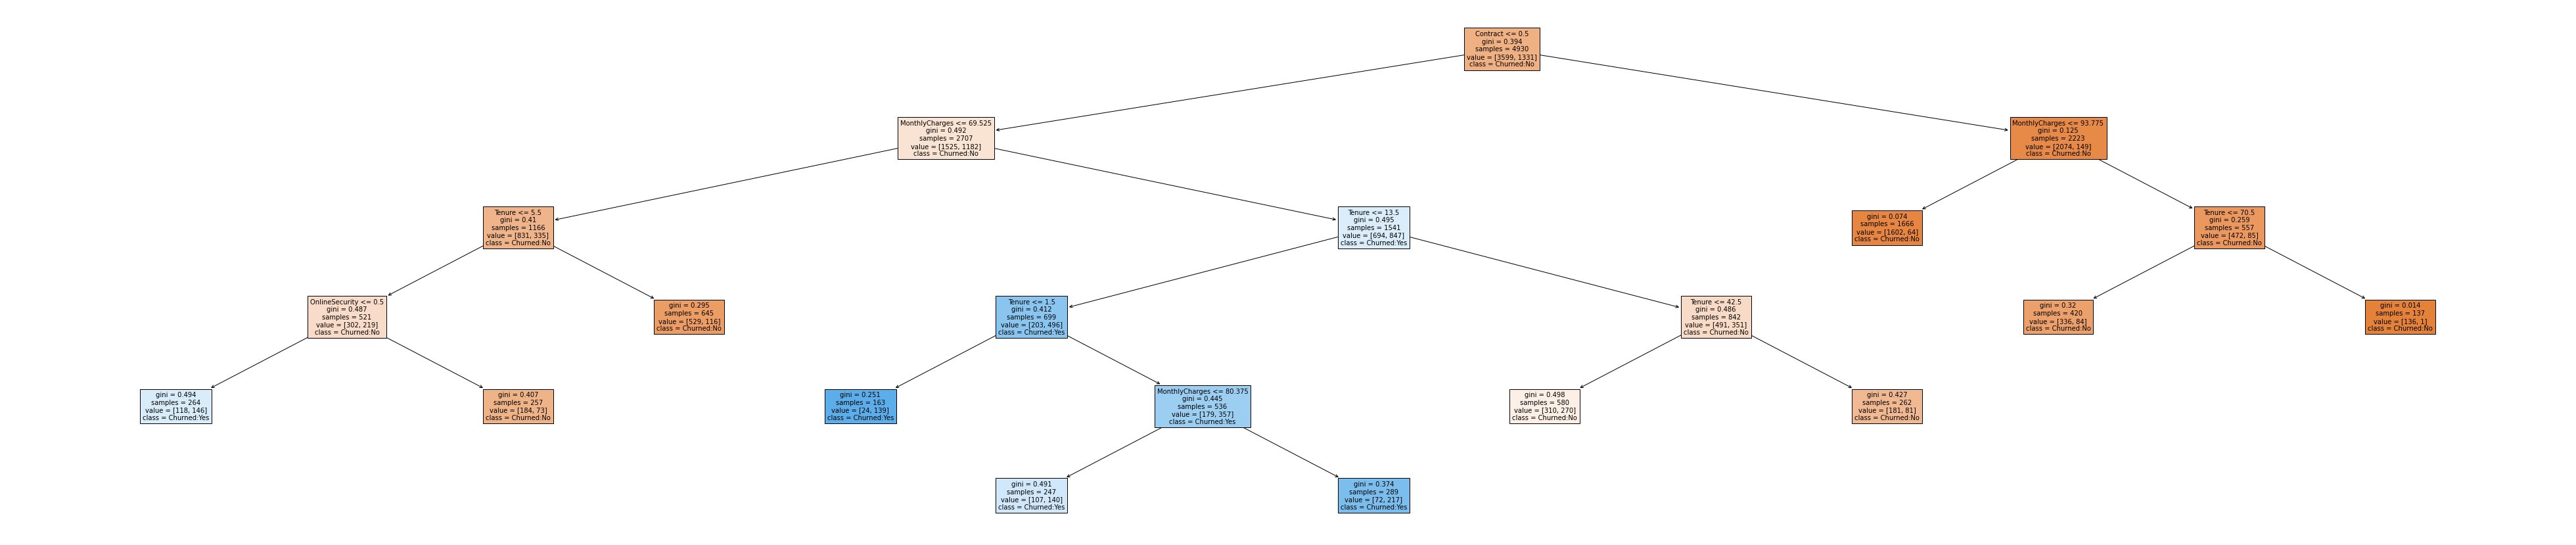

In [18]:
feature_names = X_train.columns
feature_names

fig = plt.figure(figsize=(70,15))
_ = plot_tree(clfccp,
                  feature_names=feature_names,
                  class_names={0:'Churned:No', 1:'Churned:Yes'},
                  filled=True,
                  fontsize=10)

**5.** (4 points) How would you classify a customer with the following characteristics according to
the cost-complexity pruned decision tree? Explain your answer.

- Gender: Female
- Contract: Month-to-month
- OnlineSecurity:Yes  
- Tenure:4 
- MonthlyCharges:65 
- TotalCharges:260 
- PaymentMethod:Mailed check
- Reason: NotApplicable


As we can see we get the result of "array([0])" which represents the classification of Not Churned. We used the given and removed those not considered in our tree. Then we altered the categories into encoded representation. 

If we read the graph manually, we start from Root Node, Contract is encoded as 0. Since first split is on Contract <= 0.5, we move left to child node which is MonthlyCharges <= 69.525. The MonthlyCharges is 65, thus we move left to child node which is Tunure <=5.5. Our Tenure is 4, thus we move left to child node which is OnlineSecurity <=0.5. We have 2 which is larger than 0.5, thus we move right to classification node: Not Churned with gini of 0.407. 

In [19]:
customer = {
    'MonthlyCharges': 65,
    'PaymentMethod': 3,
    'OnlineSecurity': 2,
    'Tenure': 4,
    'Contract': 0
}

# Convert the customer data to a DataFrame
customer_df = pd.DataFrame([customer])

result = clf.predict(customer_df)
result

array([0])

**6.** (4 points) Choose one of the evaluation metrics (accuracy, precision, recall, and F1 score) and
compare the pruned decision tree with the fully grown one based on these metrics.

The evalution metrics used here is **Recall**. The reason for this is due to the key in this question was that *predict which customers are likely to cancel their business* and *working to cultivate customer loyalty*. So the focus here is to know the probability that **a customer classified as not churned actually is not churned.** 

So our goal here is to minimize the probability that a churned customer is classified as a non churned customer.

We see below that 
- the precision with full grown Decision Tree its score is stated with *recall_full when = zero* which is 0.8253. 
- the precision with pruned Decision Tree its score is stated with *recall_ccp when = zero* which is 0.9009.

The Cost-Complexity Pruning Tree presents a bit better with higher Recall Score when it comes to the Probability of a acutally not churned customer classified as a non-churned.

In [20]:
recall_full = clf.predict(X_test)
recall_ccp = clfccp.predict(X_test)

#rec_full = recall_score(y_test, recall_full)
#rec_ccp = recall_score(y_test, recall_ccp)
rec_full0 = recall_score(y_test, recall_full,pos_label=0)
rec_ccp0 = recall_score(y_test, recall_ccp,pos_label=0)

print('recall_full when = zero',  rec_full0)
print('recall_ccp when = zero', rec_ccp0)


recall_full when = zero 0.8253968253968254
recall_ccp when = zero 0.900952380952381


**7.** (6 points) According to the fully grown decision trees, which features are most important for
explaining membership renewal?

As we can see from the below code and illustration, **MonthlyCharges** and **Tenure** are most imporatant for explaining mebership renewal. Third, comes in **Contract**. In so, **MonthlyCharges** is most important out of all where it exceed 0.40.

Axes(0.125,0.125;0.775x0.755)
                       0
MonthlyCharges  0.469493
PaymentMethod   0.070161
OnlineSecurity  0.034574
Tenure          0.246728
Contract        0.179043


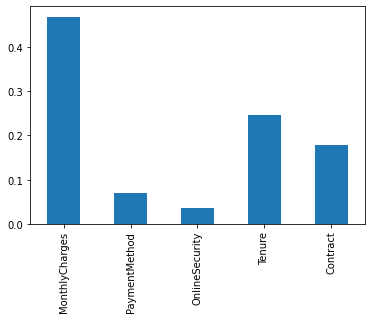

In [21]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names)
print(feature_importance.plot(kind='bar', legend=None))
print(feature_importance)

**Exercise 3: Cost Estimation (35 points)**

Susan is the head of the operating department at PrimeConnect. The customer service department
provides assistance to customers before, during, and after a purchase. This includes assistance in

1. Questions about PrimeConnect products and services
2. Making contracts and purchases
3. Troubleshooting
4. Maintenance
5. Bills and payments
6. Cancellation of contracts

The customer service departments are organized autonomously for each state. This implies that each
department is responsible for its office spaces, equipment, hiring, and training. In addition, the
customer service departments are also autonomous in how they provide assistance. They have their
own websites where they are responsible for what information is presented and how this information
is presented. Further, they can decide which communication channels they offer. Examples of
communication channels are phone, e-mail, chat, and social media.
The autonomy and flexibility of the customer service departments allow them to adapt to the
particular preferences and needs of the customers in each state. This is one of the reasons why
PrimeConnect's customer service is so excellent. However, the pressure from the increased
competition makes it necessary for PrimeConnect to seek ways to decrease its costs. As the customer
service departments cause high costs and there is quite some variation in the departments' costs in
different states, you were asked to support Susan in finding ways to decrease the costs in the customer
service departments.
Susan collected some data about the total costs of each customer service department and potential
cost drivers. You can find the data in 'Cost.xlsx'.

In [22]:
ce = pd.read_excel(r'Cost.xlsx')
ce.head(3)

,State,Time,NumbRequests,ComChannels,NumbCustomers,DeptCosts
0,Alabama,3410,80,2,15838,52744.34
1,Alaska,2979,47,1,11107,46044.03
2,Arizona,5099,66,4,23717,68237.74


**1.** (5 points) Plot the customer service department costs vs. each cost driver. Analyze the data
for potential problems.

In [23]:
fig = make_subplots(rows=4, cols=1)

fig.add_trace(
    go.Scatter(x=ce['Time'], 
               y=ce['DeptCosts'],
               mode='markers', text=ce['State'] ),

1,1)

fig.add_trace(
    go.Scatter(x=ce['NumbRequests'], 
               y=ce['DeptCosts'], mode='markers', text=ce['State']),
2,1)


fig.add_trace(
    go.Scatter(x=ce['ComChannels'], 
               y=ce['DeptCosts'], mode='markers', text=ce['State']),
3,1)

fig.add_trace(
    go.Scatter(x=ce['NumbCustomers'], 
               y=ce['DeptCosts'], mode='markers', text=ce['State']),
4,1)

fig.update(layout_showlegend=False)


fig.update_layout(
    xaxis=dict( title='Average Total Time Spent on Customer Requests (per month)'),
    xaxis2=dict( title='Average Number of Customer Requests (per month)'),
    xaxis3=dict( title='Number of Communication Channels Available'),
    xaxis4=dict( title='Number of Customers Assigned to the Customer Service Department'),
    yaxis=dict( title = 'Dept. Cost ($)'),
    yaxis2=dict( title = 'Dept. Cost ($)'),
    yaxis3=dict( title = 'Dept. Cost ($)'),
    yaxis4=dict( title = 'Dept. Cost ($)')
)



fig.update_layout(
    height=800,
    title_text="Scatter Plots For Each Cost Driver"
    )


fig.show()

In [24]:
ce[ce['State'] == 'Virginia']

,State,Time,NumbRequests,ComChannels,NumbCustomers,DeptCosts
45,Virginia,7519,55,10,19524,93875.29


In all four of the scatter plot, we significantly observe that Virginia appears to be an outlier. We can see in the excel file that the Number of Customers is only 19524 yet the Average Time Spent on customers is 7519. The NumbRequests and ComChannels are all relatively high in terms of other States. We can assume that in Virginia during this excel was an temporary exception as it does not relatively presents an overview to the norm of dataset. Thus we eliminate this observation from the further analysis.

In [25]:
ce = ce[ce['State'] != 'Virginia']

**2.** (6 points) Use regression analysis to develop cost models for all cost drivers. Identify the best
model and explain why.


We have identified the best model here to the multivariate regression model with the Average Total Time Spent on Customer Requests (per month) and the Average Number of Customer Requests Processed per month and Number of Communication Channels Available to Contact the
Customer Service as independent variables is the one with the highest adjusted R_squared and, therefore, should be used for further analysis. 

We can see that the top two models are 
- model 12: 'DeptCosts ~ Time + NumbRequests + ComChannels + NumbCustomers'
- model 14: 'DeptCosts ~ Time + NumbRequests + ComChannels'

We have chosen model 14 because of its higher adjusted R_squared. Also if we take a look at its variable "NumbCustomers" We see its coefficient is -0.0186 with P-value of  0.724. This means that each increasing customers will instead bring down the cost. This does not economically meet the norm. The P-vlaue also states that it is not significant. Then we take a look at model 14. All varaibles are significant (P-values < 0.05) and its coefficients are positive which is acceptable to assume in terms of cost for the dependent variable.

**Final Model**

Department Cost = 
- 1.325e+04 + 
- 9.2458 * Average total time spent on customer requests per month + 
- 72.2524 * Average number of customer requests processed per month + 
- 326.3311 * Number of communication channels available to contact the
customer service

In [26]:
ce.head(3)

,State,Time,NumbRequests,ComChannels,NumbCustomers,DeptCosts
0,Alabama,3410,80,2,15838,52744.34
1,Alaska,2979,47,1,11107,46044.03
2,Arizona,5099,66,4,23717,68237.74


In [27]:
m = smf.ols('DeptCosts ~ Time', data=ce)
m = m.fit()

m2 = smf.ols('DeptCosts ~ NumbRequests', data=ce)
m2 = m2.fit()

m3 = smf.ols('DeptCosts ~ ComChannels', data=ce)
m3 = m3.fit()

m4 = smf.ols('DeptCosts ~ NumbCustomers', data=ce)
m4 = m4.fit()

m5 = smf.ols('DeptCosts ~ Time + NumbRequests', data=ce)
m5 = m5.fit()

m6 = smf.ols('DeptCosts ~ Time + ComChannels', data=ce)
m6 = m6.fit()

m7 = smf.ols('DeptCosts ~ Time + NumbCustomers', data=ce)
m7 = m7.fit()

m8 = smf.ols('DeptCosts ~ NumbRequests + NumbCustomers', data=ce)
m8 = m8.fit()

m9 = smf.ols('DeptCosts ~ NumbRequests + ComChannels', data=ce)
m9 = m9.fit()

m10 = smf.ols('DeptCosts ~ ComChannels + NumbCustomers', data=ce)
m10 = m10.fit()

m11 = smf.ols('DeptCosts ~ NumbRequests + ComChannels + NumbCustomers', data=ce)
m11 = m11.fit()

m12 = smf.ols('DeptCosts ~ Time + NumbRequests + ComChannels + NumbCustomers', data=ce)
m12 = m12.fit()

m13 = smf.ols('DeptCosts ~ Time + NumbRequests + NumbCustomers', data=ce)
m13 = m13.fit()

m14 = smf.ols('DeptCosts ~ Time + NumbRequests + ComChannels', data=ce)
m14 = m14.fit()

print(m.rsquared)
print(m2.rsquared)
print(m3.rsquared)
print(m4.rsquared)
print(m5.rsquared_adj)
print(m6.rsquared_adj)
print(m7.rsquared_adj)
print(m8.rsquared_adj)
print(m9.rsquared_adj)
print(m10.rsquared_adj)
print(m11.rsquared_adj)
print(m12.rsquared_adj)
print(m13.rsquared_adj)
print(m14.rsquared_adj)

0.9189944851372154
0.020653040787111054
9.2528581796536e-08
0.006600380679075757
0.9319862419044992
0.917240185447718
0.9155242383196602
-0.006762733400371035
-0.02017533678036898
-0.03605233989211287
-0.0289023263605237
0.9364231309570616
0.9313987061976168
0.937657806828729


In [28]:
print(m12.summary())

                            OLS Regression Results                            
Dep. Variable:              DeptCosts   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     177.7
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.51e-26
Time:                        03:24:00   Log-Likelihood:                -453.10
No. Observations:                  49   AIC:                             916.2
Df Residuals:                      44   BIC:                             925.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.358e+04   2536.639      5.352

In [29]:
print(m14.summary())

                            OLS Regression Results                            
Dep. Variable:              DeptCosts   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     241.6
Date:                Thu, 23 May 2024   Prob (F-statistic):           9.44e-28
Time:                        03:24:00   Log-Likelihood:                -453.17
No. Observations:                  49   AIC:                             914.3
Df Residuals:                      45   BIC:                             921.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.325e+04   2338.322      5.666   

**3.** (6 points) Explain what the model means from an economic perspective.


Department Cost = 
- 1.325e+04 + 
- 9.2458 * Average total time spent on customer requests per month + 
- 72.2524 * Average number of customer requests processed per month + 
- 326.3311 * Number of communication channels available to contact the
customer service

The average total time spent on customer requests per month measures the duration spent on requests. Some requests requires long-duration for solving or dealing with, whereas some takes short amount of time. The longer the time spent on requests, the more human captial are needed; thus, bringing higher department costs. The model supports this relationship. 

The similarity applies to variable the average number of customer requests processed per month. This measures the number of acitivity of handling the requests. Each state have different average number of customer requests per month. Some might be handling large quantity of requests each month whilst some handles very little requests each month. The larger the average number of customer requests, the larger the cost is on handling these requests. This model supports this relationship. 

The Number of communication channels available to contact the customer service measures the establishment of channels avalibility for customer services. The more channels a state has for customer services, the higher of cost it bears since there are more availibility for incoming requests and thus more time spent on the requests. These channels need personnel and each personnel have to review and maintained the channels. This should lead to higher department costs. The model supports this relationship as well. 

Last, which is not included in the model is the Number of Customers which measures the number of customers assigned to the customer service department. In genreal, it would be acceptable to assum that the more of the number of customers allocated to the state, the larger the department costs would be. However, the analysis actually do not present relationship between these two variables.

**4.** (8 points) Use the model to make two recommendations to PrimeConnect for improving the
efficiency of the operating department. Be specific with the details of the recommendation.


We use a conservative estimate based on the final regression model to estimate the potential cost savings from the recommended activities. We use 180 USD per hour of average time and 5000 USD per Communication Channels.

**Time**


The average time spent on customer requests per month should not depend on the amount of number of customers. Currently, the range of time spent is from 2100 to 7180, with a median of 4201. Time reduction should initially be targeted at those with an extremely high number of time spent on customer requests. The recommendation is for all states to reduce their time to 4800 or fewer. The few states with the high numbers would have to decrease their time by almost 35%. Thus, the recommendation is as follows: all states should reduce their average time spent to 4800 or fewer within six months, except those time with more than 5500 ; those states should reduce their time by 15% in the first six months and to 4800 in the second six months. 

In [30]:
ce['Time'].describe()

count      49.000000
mean     4201.204082
std      1142.836402
min      2100.000000
25%      3317.000000
50%      4011.000000
75%      5050.000000
max      7180.000000
Name: Time, dtype: float64

In [31]:
figt = go.Figure(data=[go.Histogram(x=ce['Time'],
                                  xbins=dict(size=5.0),)])

figt.update_layout(title_text='Distribution of Average Total Time Spent on Customer Requests per Month')
    
figt.show()

In [32]:
ce['TimeReduction'] = ce['Time']-4800
ce.loc[ce['TimeReduction']<0,'TimeReduction']=0
ce['TimeReductionPerc']= ce['TimeReduction']/ce['Time']*100


In [33]:
ce['TimeReduction1'] = ce['TimeReduction']
ce.loc[ce['Time']>5500,'TimeReduction1']=round(ce['Time']*0.15)

In [34]:
print('In the first 6 months, the time spent on customer requests per month is reduced by', np.sum(ce['TimeReduction1']),'.')
print('This results in estimated cost savings of'  , np.sum(ce['TimeReduction1'])*180, 'USD per year.')

print('After 12 months, time spent on customer requests per month will be reduced by', np.sum(ce['TimeReduction']),'in total.')
print('A conservative estimate of the total cost savings from reducing time spent on customer requests per month is'  ,np.sum(ce['TimeReduction'])*180, 'USD per year.')

In the first 6 months, the time spent on customer requests per month is reduced by 8476 .
This results in estimated cost savings of 1525680 USD per year.
After 12 months, time spent on customer requests per month will be reduced by 11158 in total.
A conservative estimate of the total cost savings from reducing time spent on customer requests per month is 2008440 USD per year.


**ComChannels**

As the company increase in size, the number of customers is expected to increase, and moreover leading to growing number of customers in need of customer services. Thus, a better metric for analyzing communication channels is the average customer per channels (NC/CC). Across all states, the NC/CC ranged from 284 rate to 40718 rate. Twenty-two states were very low (under 5000 rate), and thirty more were somewhat underachieving (under 9000 rate).

In [35]:
ce['NCCC']=ce['NumbCustomers']/ce['ComChannels']
ce['NCCC'].describe()

count       49.000000
mean      9312.691885
std       9833.392935
min        284.000000
25%       3234.714286
50%       5929.250000
75%       9735.000000
max      40718.000000
Name: NCCC, dtype: float64

In [36]:
fig = go.Figure(data=[go.Histogram(x=ce['NCCC'],
                                  xbins=dict(size=10000.0),)])

fig.update_layout(title_text='Distribution of Customers per Channels')
    
    
fig.show()

In [37]:
np.sum(ce['NCCC']<9000)

33

In [38]:
np.sum(ce['NCCC']<5000)

22

The target for all state is to be more than 9000 rate of customers per channel. In order to implement this change reasonably, state should increase their average NC/CC by 15% every 4 months if the NC/CC rate is less than the 9000 rate, and 20% if less than the 5000 rate.

In [39]:
ce['NCCC'] = ce['NumbCustomers'] / ce['ComChannels']

target_rate_9000 = 9000
target_rate_5000 = 5000
increase_15 = 1.15
increase_20 = 1.20

# First 4-month period adjustment
ce['NewComChannels1'] = ce['ComChannels']
ce.loc[ce['NCCC'] < target_rate_9000, 'NewComChannels1'] = round(ce['NumbCustomers'] / (ce['NCCC'] * increase_15))
ce.loc[ce['NCCC'] < target_rate_5000, 'NewComChannels1'] = round(ce['NumbCustomers'] / (ce['NCCC'] * increase_20))
ce['Savings1'] = (ce['ComChannels'] - ce['NewComChannels1']) 

# Second 4-month period adjustment
ce['NewComChannels2'] = ce['NewComChannels1']
ce.loc[ce['NumbCustomers'] / ce['NewComChannels1'] < target_rate_9000, 'NewComChannels2'] = round(ce['NumbCustomers'] / ((ce['NumbCustomers'] / ce['NewComChannels1']) * increase_15))
ce.loc[ce['NumbCustomers'] / ce['NewComChannels1'] < target_rate_5000, 'NewComChannels2'] = round(ce['NumbCustomers'] / ((ce['NumbCustomers'] / ce['NewComChannels1']) * increase_20))
ce['Savings2'] = (ce['NewComChannels1'] - ce['NewComChannels2']) 

# Third 4-month period adjustment
ce['NewComChannels3'] = ce['NewComChannels2']
ce.loc[ce['NumbCustomers'] / ce['NewComChannels2'] < target_rate_9000, 'NewComChannels3'] = round(ce['NumbCustomers'] / ((ce['NumbCustomers'] / ce['NewComChannels2']) * increase_15))
ce.loc[ce['NumbCustomers'] / ce['NewComChannels2'] < target_rate_5000, 'NewComChannels3'] = round(ce['NumbCustomers'] / ((ce['NumbCustomers'] / ce['NewComChannels2']) * increase_20))
ce['Savings3'] = (ce['NewComChannels2'] - ce['NewComChannels3']) 

# Calculate the final target number of communication channels to reach 9000 customers per channel
ce['FinalTargetComChannels'] = ce['ComChannels']
ce.loc[ce['NCCC'] < 9000, 'FinalTargetComChannels'] = np.floor(ce['NumbCustomers'] / 9000)
ce['FinalSavings'] = (ce['ComChannels'] - ce['FinalTargetComChannels']) 

In [40]:
print('After the first 4 months, number of communication channels available are reduced by', round(np.sum(ce['Savings1'])), 'per year')
print('After 8 months, number of communication channels available are additionally reduced by', round(np.sum(ce['Savings2'])), 'per year')
print('After 1 year, number of communication channels available are additionally reduced by', round(np.sum(ce['Savings3'])), 'per year' )

After the first 4 months, number of communication channels available are reduced by 33 per year
After 8 months, number of communication channels available are additionally reduced by 24 per year
After 1 year, number of communication channels available are additionally reduced by 20 per year


**5.** (10 points) Estimate the cost savings from the implementation of your recommendations.

We have beforehand mentioned that we use 5000 USD per Communication Channels.

In [41]:
print('The reduction in ComChannels after 1 year would be',round(np.sum(ce['Savings1']))+round(np.sum(ce['Savings2']))+round(np.sum(ce['Savings3'])), 'per year, which results in estimated cost savings of',(round(np.sum(ce['Savings1']))+round(np.sum(ce['Savings2']))+round(np.sum(ce['Savings3'])))*5000, 'USD per year.'  )

The reduction in ComChannels after 1 year would be 77 per year, which results in estimated cost savings of 385000 USD per year.


In [42]:
print('If all stores achieve the target, the expected cost savings would be', np.sum(ce['FinalSavings'])*5000, 'USD per year.')

If all stores achieve the target, the expected cost savings would be 670000 USD per year.


After the model utilisation,ComChannels would be reduced by 33 in the first round (four-month period), purchase orders would be additionally reduced by 24 in the second round, and purchase orders would be additionally reduced by 20 in the third round. The estimated cost saving across after the first year is 385,000 USD per year. 

When all states reach the target, the yearly cost savings are 670,000 USD compared to the current state.